# CDO testing

This notebook runs the teleconnection diagnostics written with cdo python bindings

In [1]:
import sys
from aqua import Reader
from aqua.util import get_config_dir, get_machine

sys.path.insert(1, '/work/bb1153/b382289/AQUA/diagnostics/teleconnections/')
from cdotesting import *
from tools import *
from plots import *

In [2]:
# Teleconnection config details
diagname  = 'teleconnections'
configdir = get_config_dir()
machine   = get_machine(configdir=configdir)

# Opening yml files
namelist = load_namelist(diagname)

## NAO

In [3]:
# Configuration specific to the NAO teleconnection
telecname = 'NAO'
fieldname = namelist[telecname]['field']

# Configuring the reader
configdir = '../../../config/'

model = 'ERA5'
exp  = 'era5'
source = 'monthly'

reader = Reader(model=model, exp=exp, source=source,regrid='r100')

# Retrieving the data
data = reader.retrieve(var=fieldname)
infile = data[fieldname]
infile = infile.sel(time=slice('1989-01-01','1995-12-01'))
infile = reader.regrid(infile)
infile = infile.to_netcdf('../data/nao_test.nc')

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'NAO index'}, xlabel='time', ylabel='NAO index'>)

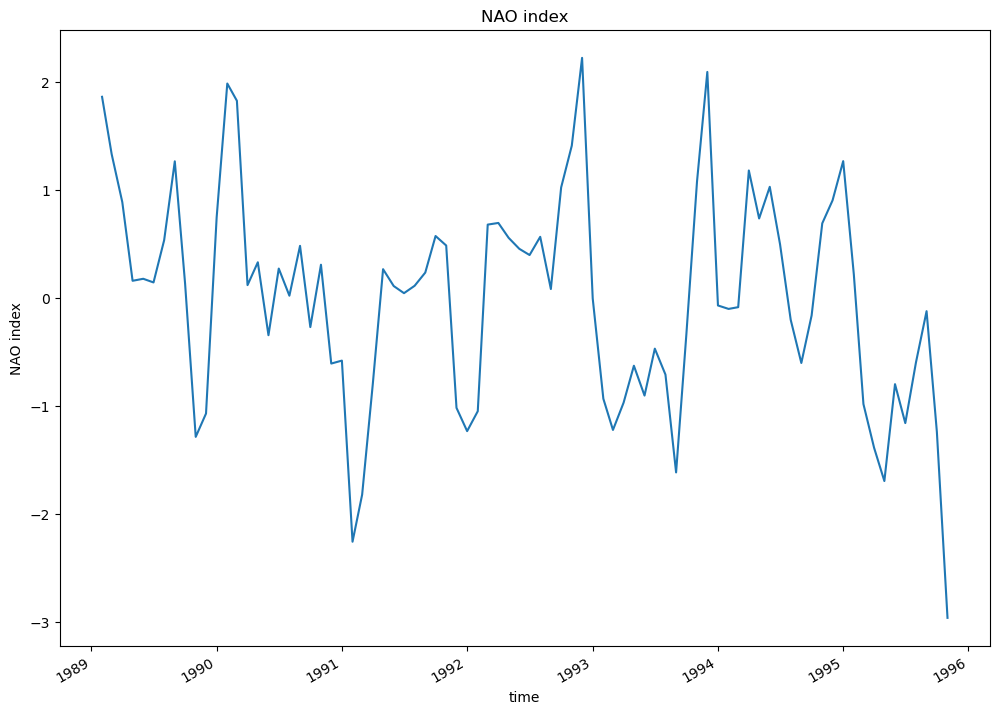

In [4]:
test = station_based_cdo('../data/nao_test.nc',namelist,telecname)
simple_plot(test[fieldname],title='NAO index',xlabel='time',ylabel='NAO index')

## ENSO

In [11]:
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:  (time: 996, lon: 1440, lat: 721, plev: 8)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * plev     (plev) float64 1e+03 5e+03 1e+04 2.5e+04 5e+04 7e+04 8.5e+04 1e+05
Data variables: (12/16)
    E        (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    msl      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    Q        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
    SLHF     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    SSHF     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    SSR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...       ...
    TCC      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TP       (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TSR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TTR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    U        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
    V        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

In [10]:
# Configuration specific to the ENSO teleconnection
telecname = 'ENSO'
fieldname = namelist[telecname]['field']
print(fieldname)

# Retrieving the data
data = reader.retrieve(var=fieldname)
infile = data[fieldname]
infile = infile.sel(time=slice('1989-01-01','1995-12-01'))
infile = reader.regrid(infile)
infile = infile.to_netcdf('../data/enso_test.nc')

skt


KeyError: 'You are asking for variables which we cannot find in the catalog!'

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'ENSO index'}, xlabel='time', ylabel='Skin temperature [K]'>)

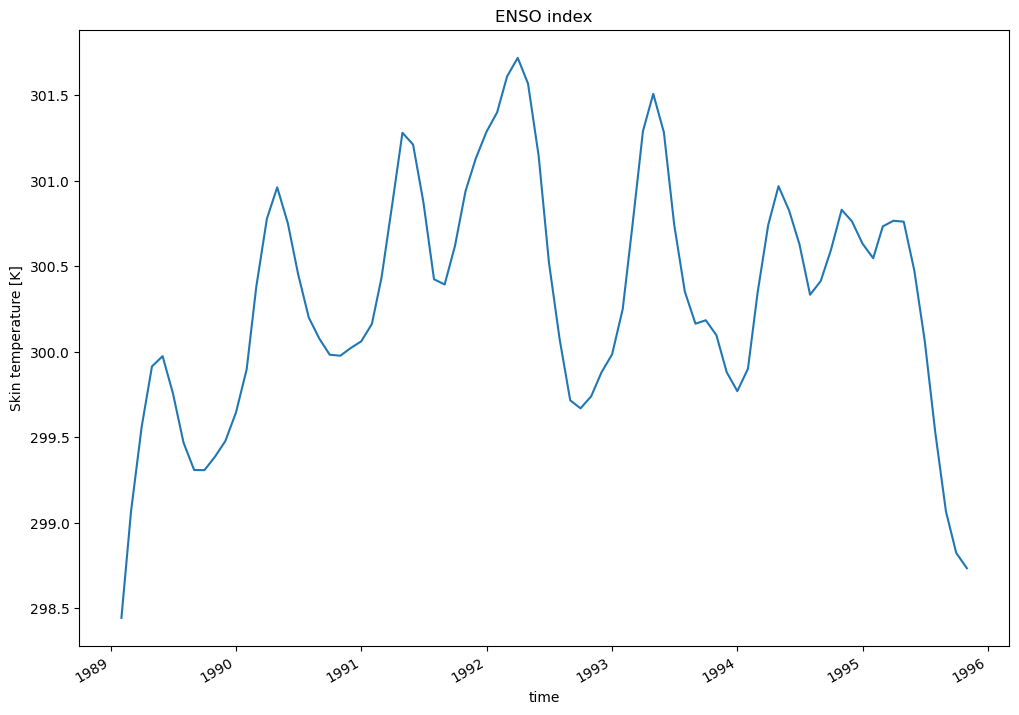

In [13]:
test = regional_mean_cdo('../data/enso_test.nc',namelist,telecname)
simple_plot(test[fieldname],title='ENSO index',xlabel='time')